In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/DEPI/Agri_data.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [8]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

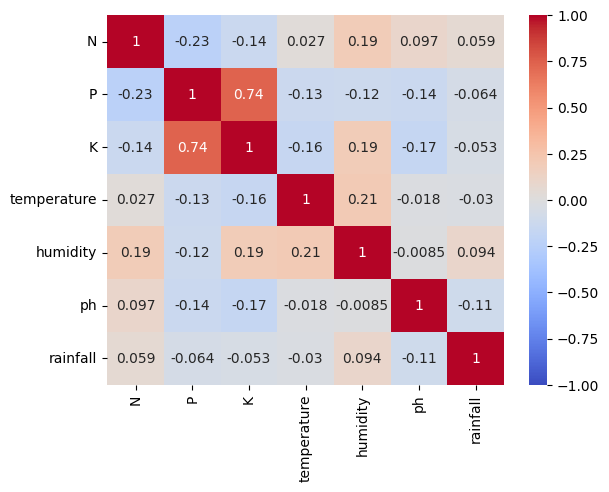

In [9]:
df1=df.drop('label',axis=1)
sns.heatmap(df1.corr(),annot=True,cmap='coolwarm',vmin =-1,vmax=1)
plt.show()

In [10]:
df.nunique()

,0
N,137
P,117
K,73
temperature,2200
humidity,2200
ph,2200
rainfall,2200
label,22


In [11]:
df['label'].value_counts()

,count
label,
rice,100
maize,100
jute,100
cotton,100
coconut,100
papaya,100
orange,100
apple,100
muskmelon,100


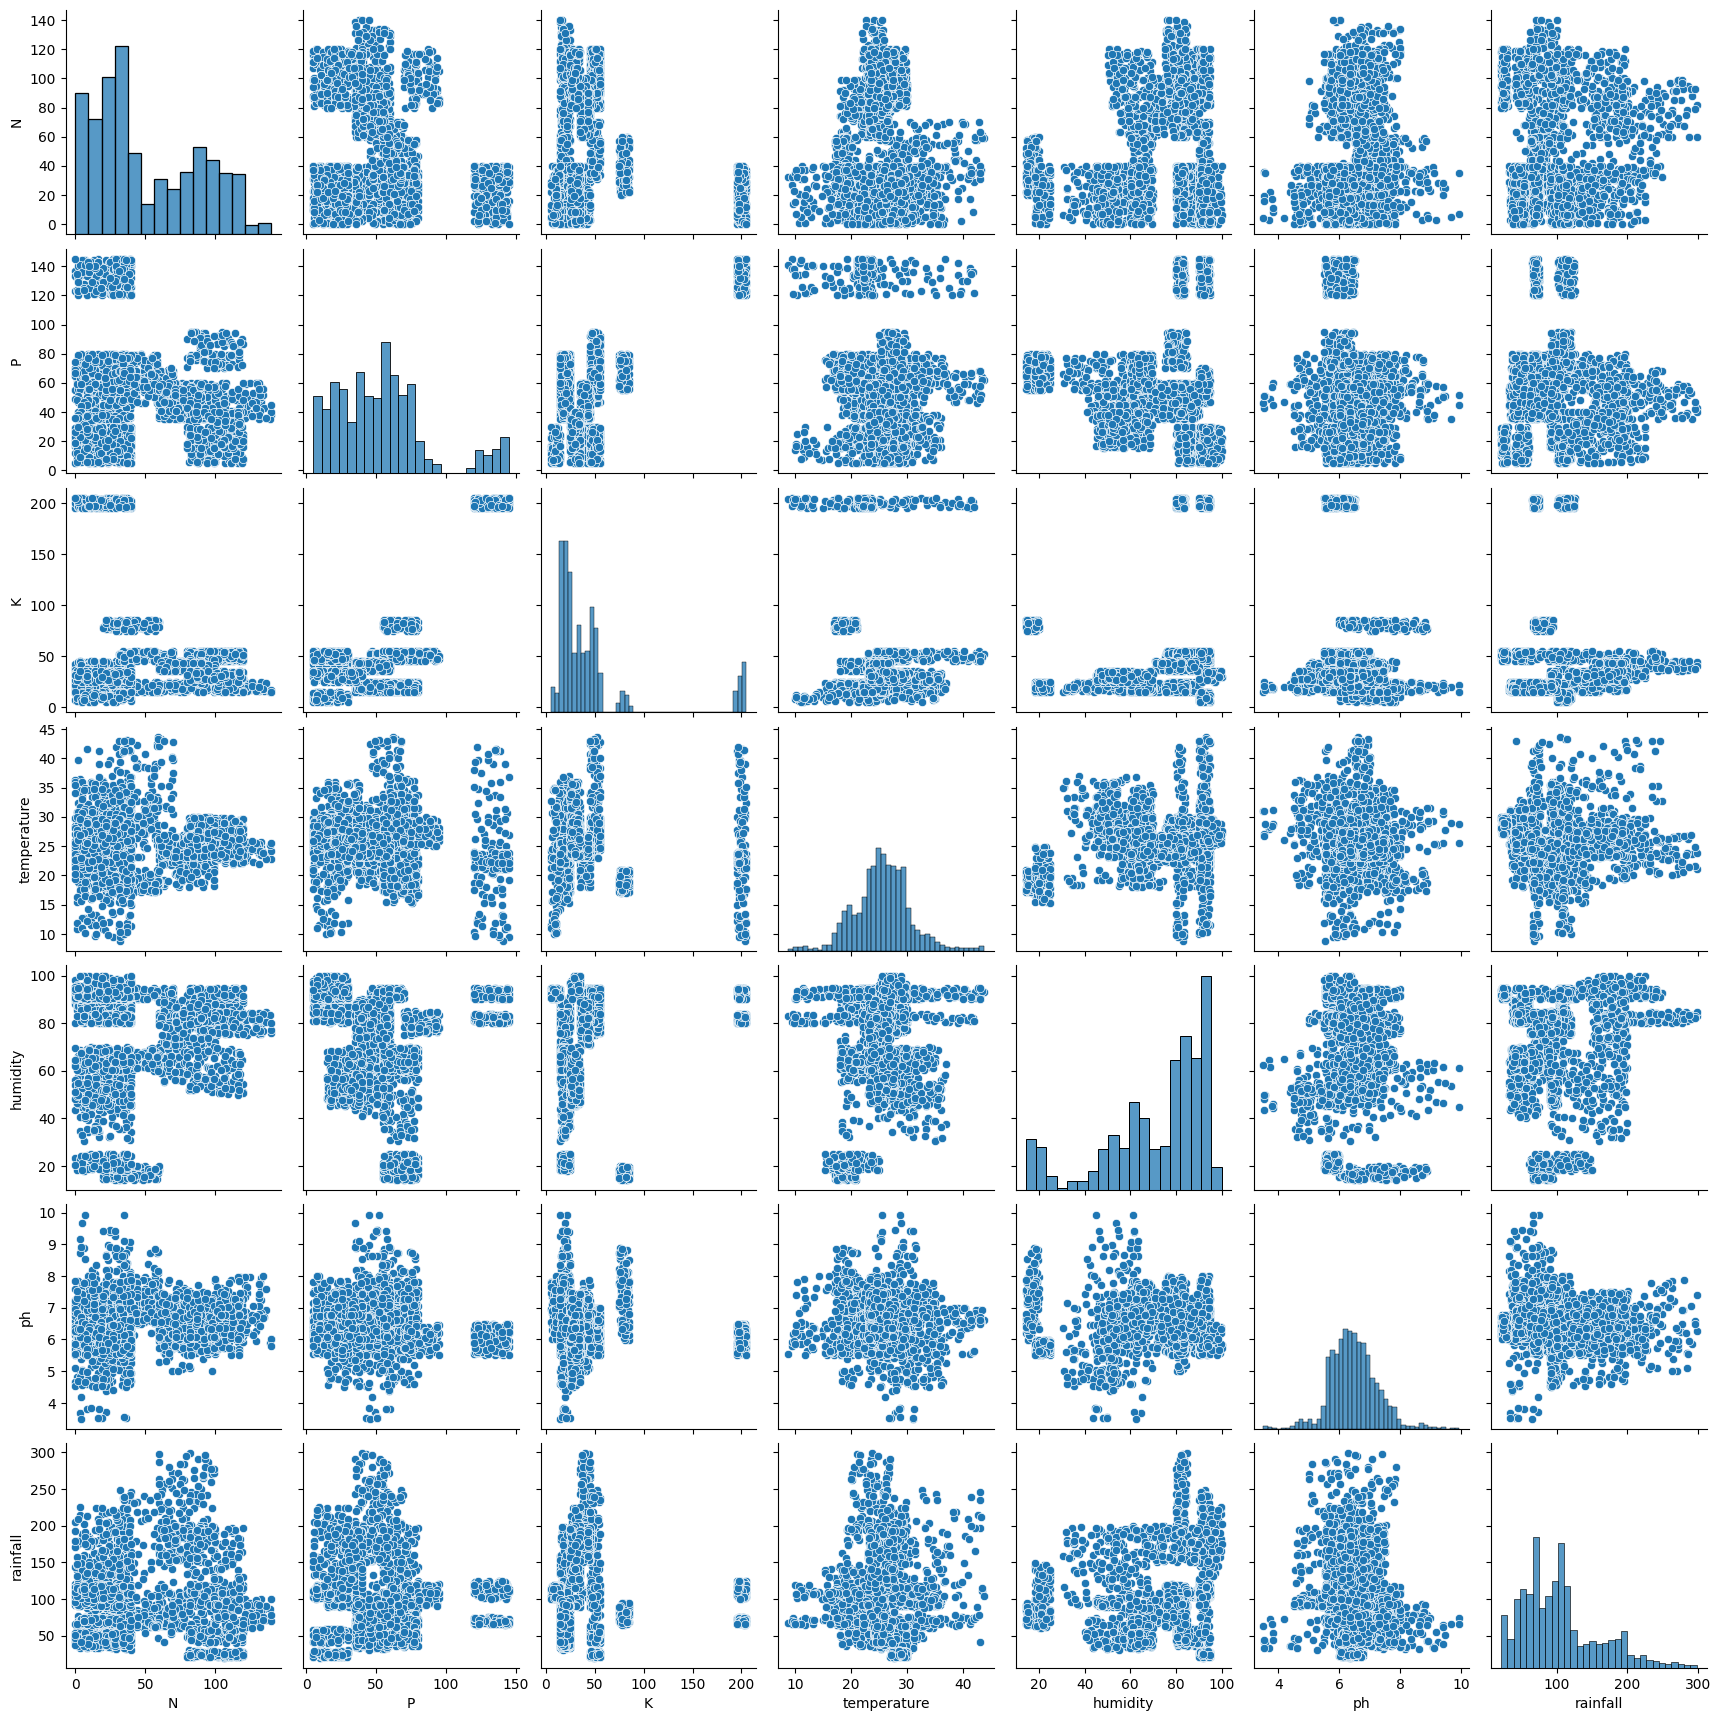

In [12]:
sns.pairplot(df)

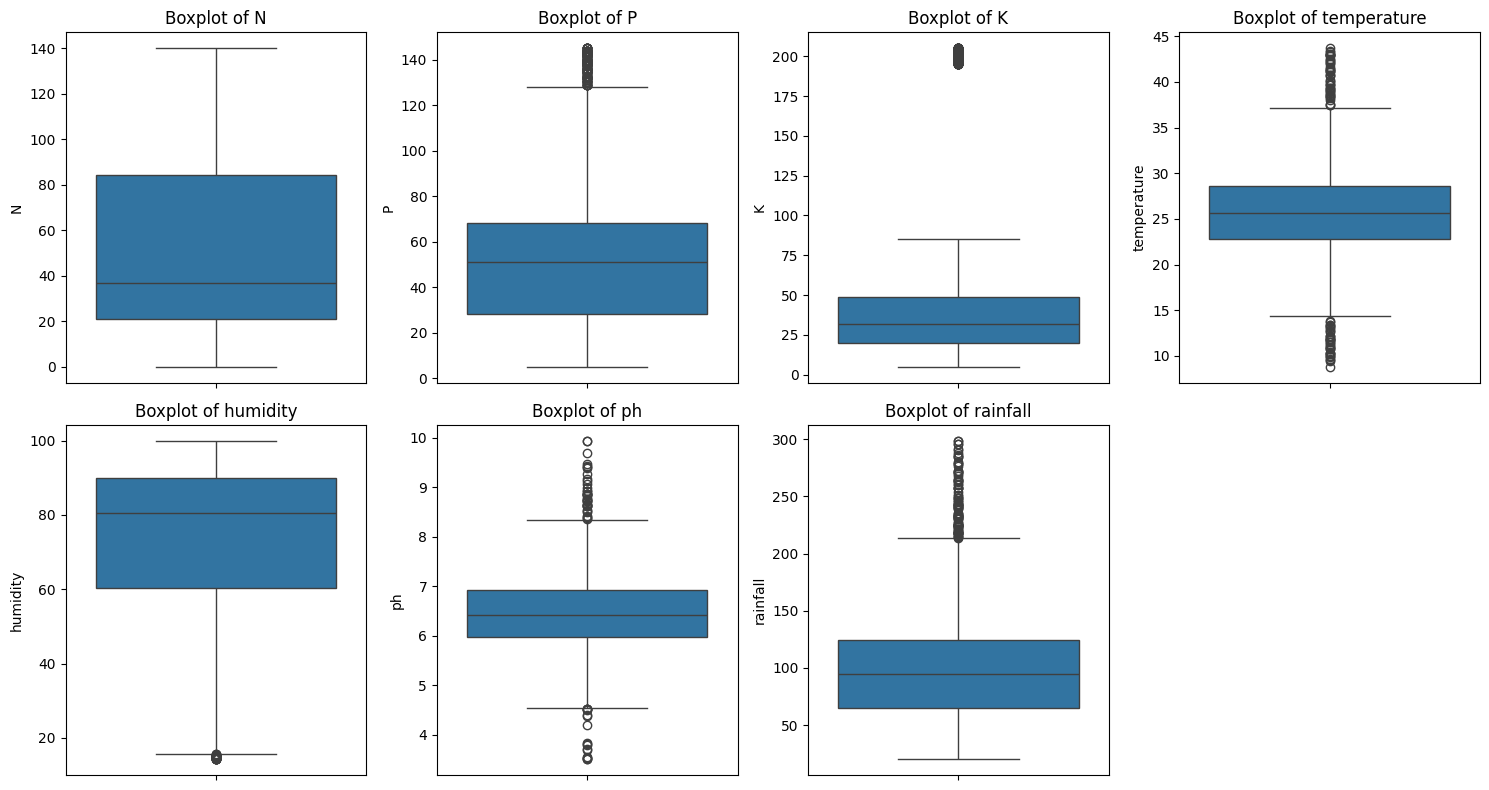

In [36]:
# Boxplots to detect outliers
cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
plt.figure(figsize=(15, 8))
for col in cols:
    plt.subplot(2, 4, cols.index(col) + 1)
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

##Box plot interpretation
1. **Nitrogen** No major outliers
2. **Phosphorus and Potassium** Needs further investigation
3. **Temprature** Outliers at both high and low temperatures (~10°C and ~40°C). This aligns with real-world conditions where some crops need cold climates (e.g., apples) while others need warm climates (e.g., mango, papaya).

4. **Humidity** clear distinction between drought-resistant crops vs. high-humidity crops.
5. **Rain fall** heavy rains are noticed further investigation is requried.

In [14]:
# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detect outliers in Phosphorus, Potassium, and Rainfall
outliers_P = detect_outliers(df, "P")
outliers_K = detect_outliers(df, "K")
outliers_rainfall = detect_outliers(df, "rainfall")

# Print the detected outliers
print("Outliers in Phosphorus (P):")
print(outliers_P)

print("\nOutliers in Potassium (K):")
print(outliers_K)

print("\nOutliers in Rainfall:")
print(outliers_rainfall)



Outliers in Phosphorus (P):
       N    P    K  temperature   humidity        ph    rainfall   label
1200  24  130  195    29.996772  81.541566  6.112306   67.125345  grapes
1201  13  144  204    30.728040  82.426141  6.092242   68.381355  grapes
1204  24  131  196    22.032962  83.743728  5.732454   65.344408  grapes
1206  35  140  197    16.775573  82.752419  6.106191   66.762855  grapes
1209  17  134  204    39.040720  80.183933  6.499605   73.884670  grapes
...   ..  ...  ...          ...        ...       ...         ...     ...
1594  35  145  195    22.039115  94.580758  6.231950  110.980401   apple
1596  25  132  198    22.319441  90.851744  5.732758  100.117344   apple
1597  31  137  196    22.144641  93.825674  6.400321  120.631078   apple
1598  36  144  196    23.651676  94.505288  6.496934  115.361127   apple
1599  10  140  197    22.169395  90.271856  6.229499  124.468311   apple

[138 rows x 8 columns]

Outliers in Potassium (K):
       N    P    K  temperature   humidity  

In [15]:

# Check which crops have high P, K, or Rainfall outliers
print("\nCrops with Phosphorus outliers:")
print(outliers_P["label"].value_counts())

print("\nCrops with Potassium outliers:")
print(outliers_K["label"].value_counts())

print("\nCrops with Rainfall outliers:")
print(outliers_rainfall["label"].value_counts())


Crops with Phosphorus outliers:
label
apple     70
grapes    68
Name: count, dtype: int64

Crops with Potassium outliers:
label
grapes    100
apple     100
Name: count, dtype: int64

Crops with Rainfall outliers:
label
rice       68
papaya     17
coconut    15
Name: count, dtype: int64


##Decisions
1. Apples and grapes seem to require higher phosphorus (P) and Potassium (K) than other crops.   **upon investigation apples and grapes requires high K an P in certain soils**.
2. **Rainfall**
Crops affected: Rice (68 occurrences), Papaya (17 occurrences), Coconut (15 occurrences).
 Rice is known for high water requirements, so this is valid.
Coconut and papaya typically grow in tropical, high-rainfall areas, so their values also make sense.

**Final decision: is to keep all values.**

#Model Training

##Data prepration

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [17]:
# Encode Target Variable
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

In [18]:
X = df.drop(columns=['label'])
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101, stratify=y)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##KNN clustring


In [19]:
# Train KNN model with optimal K=5
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

# Predict on test data
y_pred = knn_model.predict(X_test)


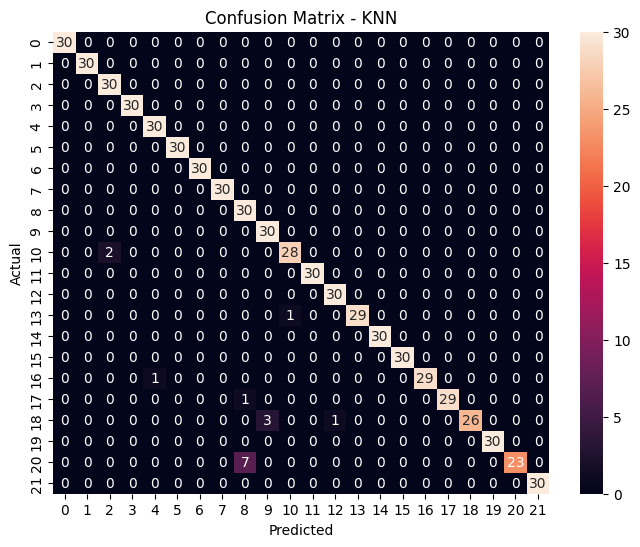

In [20]:

# Confusion Matrix Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()

In [21]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        30
           2       0.94      1.00      0.97        30
           3       1.00      1.00      1.00        30
           4       0.97      1.00      0.98        30
           5       1.00      1.00      1.00        30
           6       1.00      1.00      1.00        30
           7       1.00      1.00      1.00        30
           8       0.79      1.00      0.88        30
           9       0.91      1.00      0.95        30
          10       0.97      0.93      0.95        30
          11       1.00      1.00      1.00        30
          12       0.97      1.00      0.98        30
          13       1.00      0.97      0.98        30
          14       1.00      1.00      1.00        30
          15       1.00      1.00      1.00        30
          16       1.00      0.97      0.98        30
          17       1.00    

In [22]:
error_rate = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

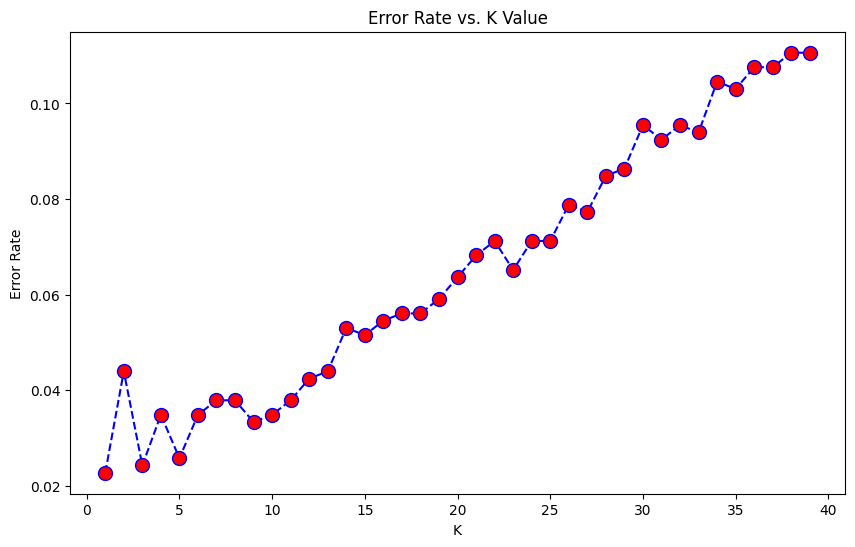

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

#K-Means Clustring

In [37]:
from sklearn.cluster import KMeans
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

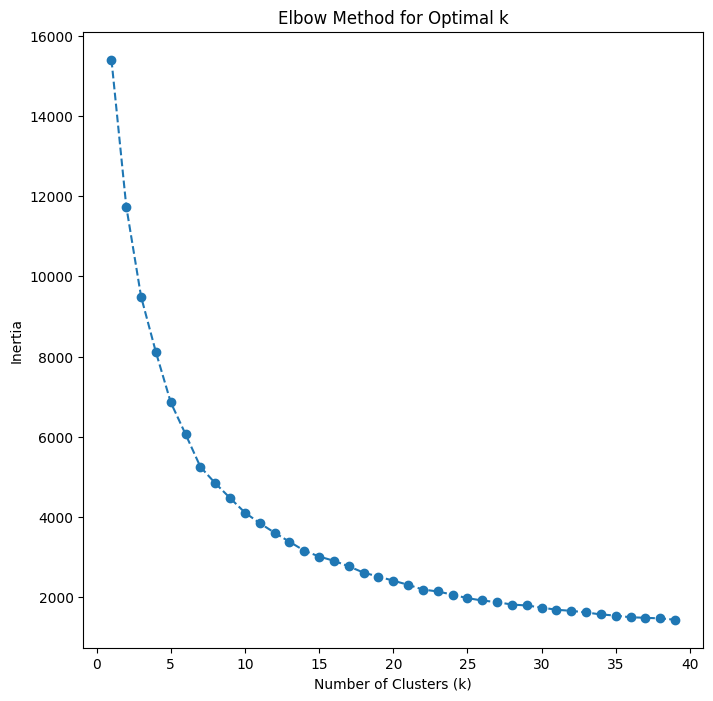

In [40]:
inertia = []
k_range = range(1, 40)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=101, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 8))
plt.plot(k_range, inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [41]:
k = 21  # Since we know the dataset consists of 21 classes
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [97]:
kmeans = KMeans(n_clusters=22, random_state=101)
kmeans.fit(X_scaled)

KMeans(n_clusters=22, random_state=101)

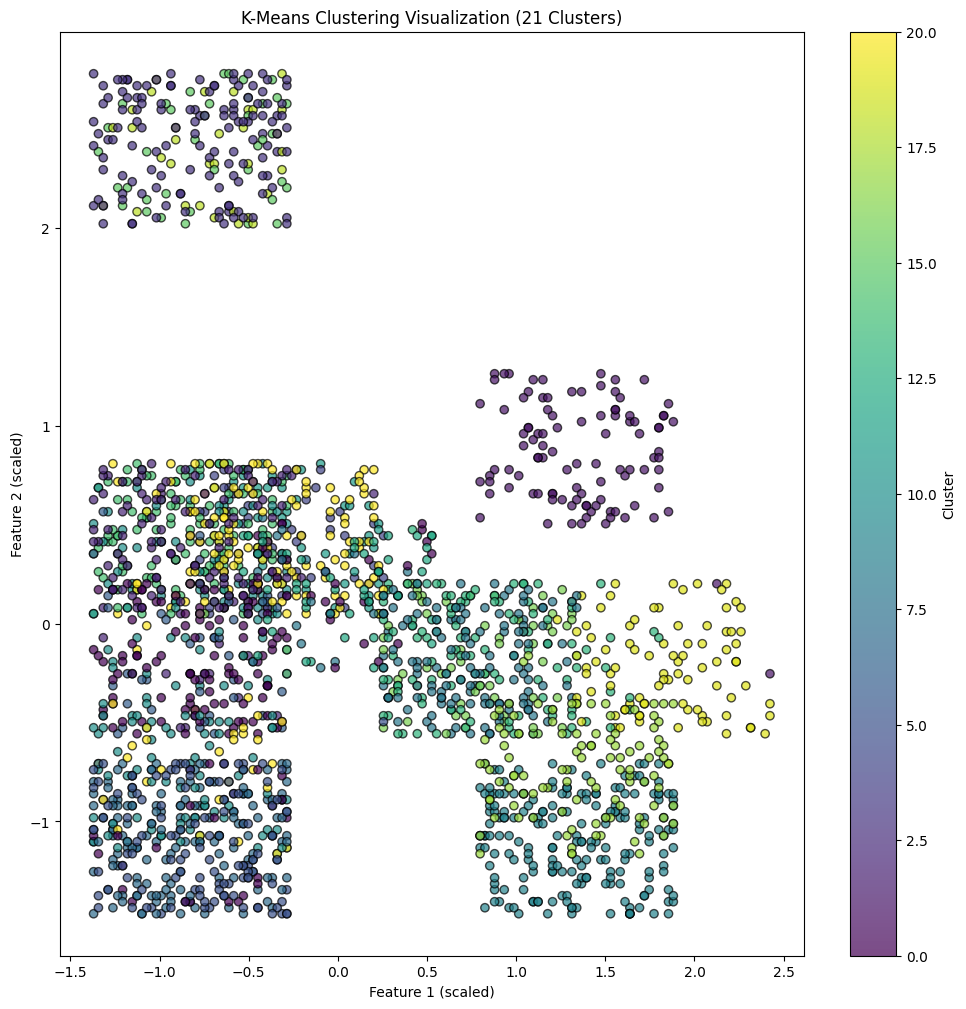

In [98]:
plt.figure(figsize=(12, 12))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering Visualization (21 Clusters)')
plt.colorbar(label='Cluster')
plt.show()

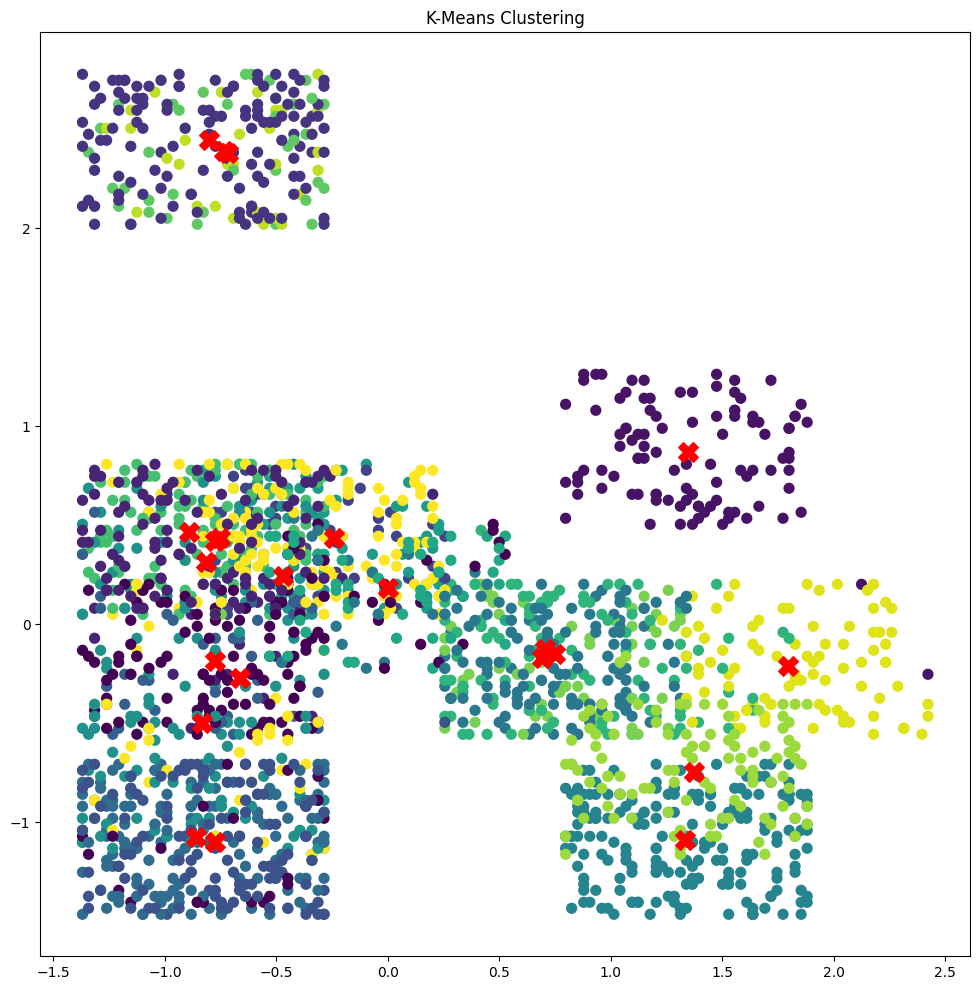

In [99]:
plt.figure(figsize=(12, 12))

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X')  # Centroids
plt.title('K-Means Clustering')
plt.show()

In [100]:
kmeans.inertia_

2244.5200675086217

In [101]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {sil_score:.3f}')


Silhouette Score: 0.345


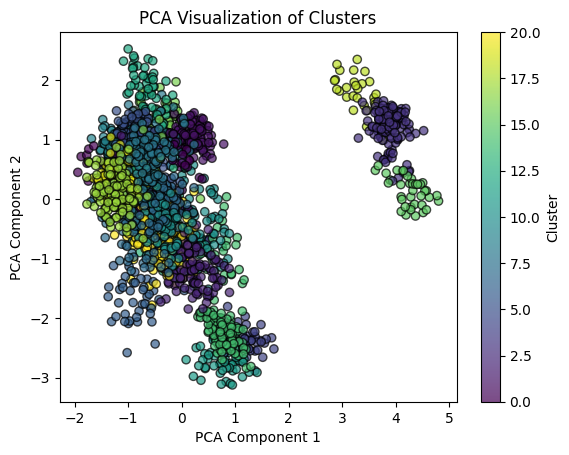

In [102]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)  # Reduce to 2D for visualization
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


#DBSCAN


In [72]:
eps_value = 0.5
min_samples_value = 5
from sklearn.cluster import DBSCAN

In [73]:
dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

In [74]:
num_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
num_noise_points = list(df['DBSCAN_Cluster']).count(-1)

In [75]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [79]:
if num_clusters > 1:
    sil_score_dbscan = silhouette_score(X_scaled[df['DBSCAN_Cluster'] != -1], df[df['DBSCAN_Cluster'] != -1]['DBSCAN_Cluster'])
    print(f'Silhouette Score (DBSCAN): {sil_score_dbscan:.3f}')
else:
    print("only one cluster found")

Silhouette Score (DBSCAN): 0.297


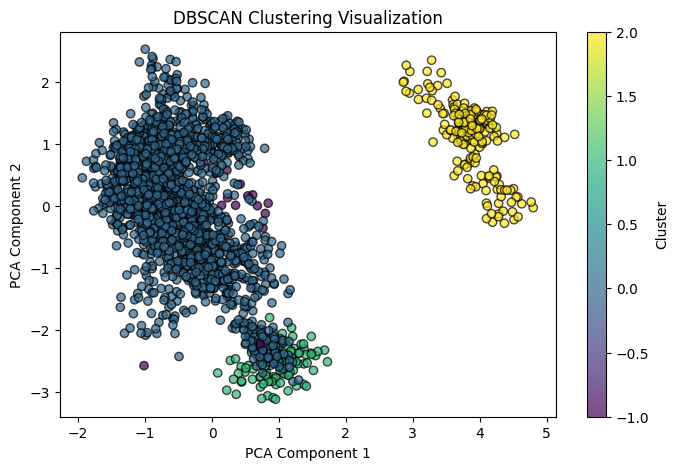

In [80]:
plt.figure(figsize=(8, 5))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['DBSCAN_Cluster'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(label='Cluster')
plt.show()

In [78]:
for eps in [0.3, 0.5, 0.7, 1.0]:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)
    num_clusters = len(set(df['DBSCAN_Cluster'])) - (1 if -1 in df['DBSCAN_Cluster'].values else 0)
    print(f"eps={eps}: {num_clusters} clusters found")


eps=0.3: 8 clusters found
eps=0.5: 45 clusters found
eps=0.7: 23 clusters found
eps=1.0: 3 clusters found


#Logistic regression


In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [83]:
X = df[features]
y = df['label']

In [84]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=101, stratify=y)


In [88]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [89]:
y_pred = log_reg.predict(X_test)

In [92]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.977

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        20
           4       0.95      1.00      0.98        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.86      0.95      0.90        20
           9       0.95      1.00      0.98        20
          10       0.95      1.00      0.98        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      0.95      0.97        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      0.95      0.

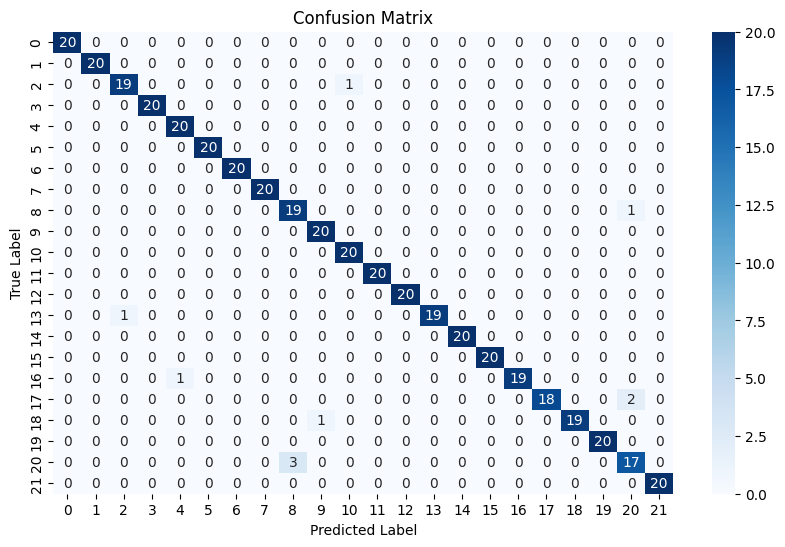

In [103]:
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()